In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
import itertools
from sklearn import preprocessing
import os
import seaborn as sns

sns.set()

In [52]:
def plot_confusion_matrix(cm, class_names, title):
    figure = plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = torch.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.0

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        if cm[i, j] > 0.01:
            if int(cm[i, j]) == float(cm[i, j]):
                plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color=color, fontsize=8)
            else:
                plt.text(j, i, "{:.2f}".format(cm[i, j]), horizontalalignment="center", color=color, fontsize=8)

    plt.tight_layout()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.close("all")
    return figure

In [65]:
file = "../data/phytodiveCNNeval-4-at-2022-11-07-08-34-5b10973e.csv"
df = pd.read_csv(file, sep=";").dropna()
df["image"] = df["image"].apply(lambda x: os.path.basename(x))
df

,image,prediction,id,cnn-eval,annotator,annotation_id,created_at,updated_at,lead_time,class
0,20220803_160105.992.0.png,Marine snow,1049395,Ambiguous,1,4278,06.11.2022 23:45,06.11.2022 23:45,8141,Noctiluca
1,20220627_112951.799.0.png,Marine snow,769044,Ambiguous,1,4264,06.11.2022 23:44,06.11.2022 23:44,6839,Noctiluca
2,20220804_004737.793.1.png,Blurry,797708,Ambiguous,1,4171,06.11.2022 23:29,06.11.2022 23:29,6458,Marine snow
3,20220722_080901.718.0.png,Blurry,939295,Ambiguous,1,4154,06.11.2022 23:25,06.11.2022 23:25,7524,Marine snow
4,20220803_235444.423.0.png,Blurry,1070559,Ambiguous,1,4143,06.11.2022 23:22,06.11.2022 23:22,5102,Marine snow
...,...,...,...,...,...,...,...,...,...,...
464,20220626_125956.308.1.png,Marine snow,834739,Wrong,1,4189,06.11.2022 23:32,06.11.2022 23:32,8969,Noctiluca
465,20220610_074412.154.0.png,Blurry,957965,Wrong,1,4181,06.11.2022 23:31,06.11.2022 23:31,6849,Marine snow
466,20220623_075158.645.1.png,Blurry,732075,Wrong,1,4157,06.11.2022 23:26,06.11.2022 23:26,14716,Noctiluca
468,20220803_182235.084.0.png,Diatom chain,1032262,Wrong,1,4028,05.11.2022 23:57,05.11.2022 23:57,5913,Noctiluca


In [53]:
le = preprocessing.LabelEncoder()
le.fit(df["class"])

y_true = le.transform(df["class"])
y_pred = le.transform(df["prediction"])
labels = le.classes_

cm = confusion_matrix(y_true=y_true, y_pred=y_pred).T

In [54]:
df["class"].unique()

array(['Noctiluca', 'Marine snow', 'Blurry', 'Diatom chain', 'Copepods',
       'Other'], dtype=object)

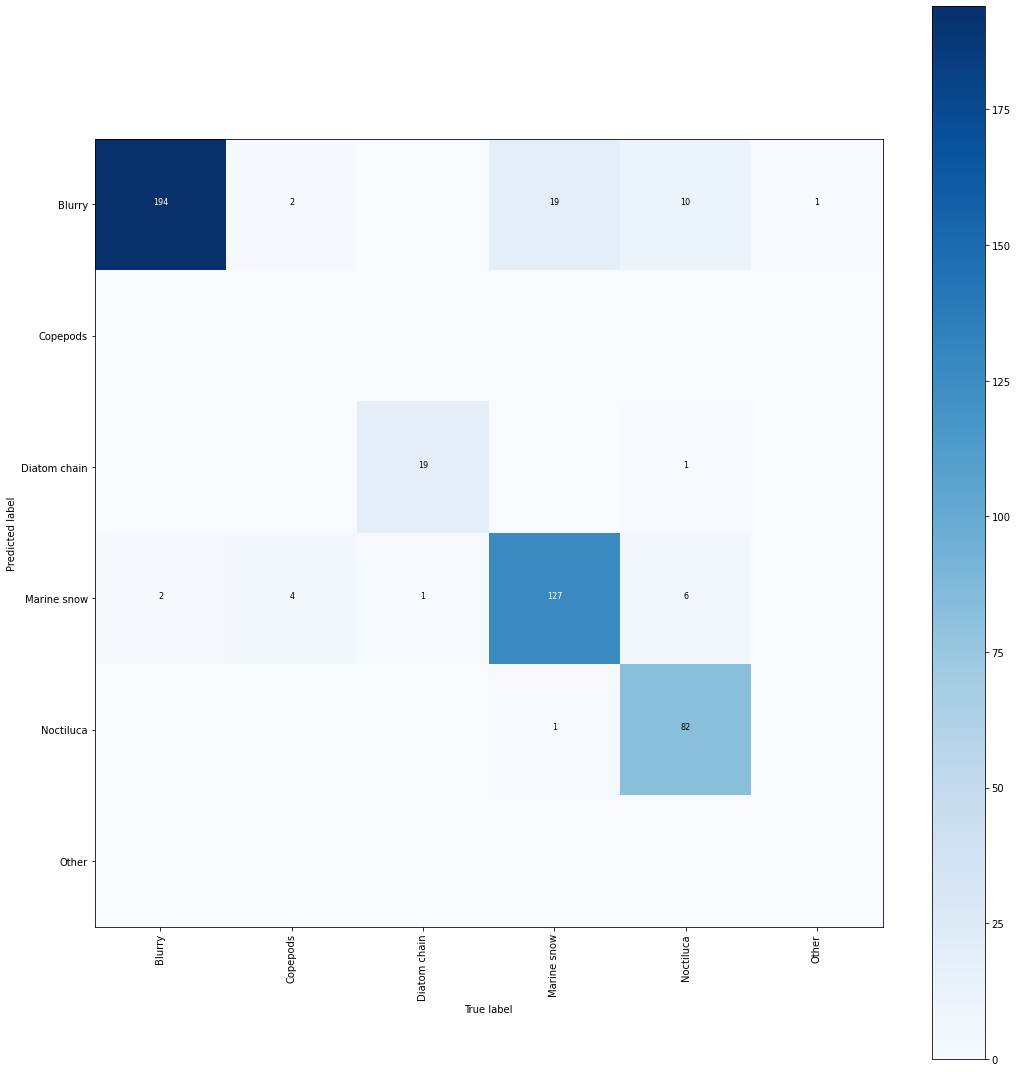

In [55]:
plot_confusion_matrix(cm, labels, "")

In [47]:
df[(df["prediction"]=="Marine snow") & (df["class"] == "Copepods")]

,image,prediction,id,cnn-eval,annotator,annotation_id,created_at,updated_at,lead_time,class
451,http://localhost:8887/20220803/20220803_1700/2...,Marine snow,1060942,Wrong,3,4355,07.11.2022 09:21,07.11.2022 09:21,11744,Copepods
458,http://localhost:8887/20220804/20220804_0100/2...,Marine snow,816344,Wrong,1,4258,06.11.2022 23:43,06.11.2022 23:43,8025,Copepods
460,http://localhost:8887/20220804/20220804_1100/2...,Marine snow,788594,Wrong,1,4214,06.11.2022 23:36,06.11.2022 23:36,15693,Copepods
463,http://localhost:8887/20220804/20220804_0300/2...,Marine snow,805034,Wrong,1,4192,06.11.2022 23:33,06.11.2022 23:33,51672,Copepods


In [59]:
# letst compare with probabilties:
out_file = "phytodive_inference_corrected.csv"
df_complete = pd.read_csv(out_file, sep=";").rename(columns={"file":"image"})
df_complete["image"] = df_complete["image"].apply(lambda x: os.path.basename(x))
df_complete

,image,prediction,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Blurry,8.634573e-01,1.756542e-03,2.699113e-03,1.615134e-03,6.848750e-03,8.951010e-04,6.880396e-03,0.107286,7.216584e-03,1.345598e-03
1,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Noctiluca,1.499603e-06,5.438512e-06,2.003172e-06,4.159707e-06,7.844421e-07,1.550680e-06,1.226949e-06,0.999958,1.322346e-05,1.177765e-05
2,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Blurry,8.101076e-01,2.873653e-04,5.175505e-04,3.070284e-04,3.184192e-04,1.242549e-04,1.763371e-03,0.185396,9.632089e-04,2.155194e-04
3,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Noctiluca,3.197874e-08,4.857573e-08,1.559766e-08,4.184464e-08,5.241418e-09,1.133740e-08,9.723526e-09,1.000000,1.989636e-07,1.607906e-07
4,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Noctiluca,1.448493e-08,1.286730e-07,3.065390e-08,1.104515e-07,1.280106e-08,2.995146e-08,9.309233e-09,0.999999,4.471720e-07,4.184870e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
363467,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Blurry,7.856658e-01,1.301801e-03,3.071045e-03,9.783700e-04,2.754735e-03,7.369284e-04,1.966744e-01,0.003628,4.265053e-03,9.238420e-04
363468,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Blurry,6.756792e-01,6.772933e-03,9.760170e-03,4.965880e-03,7.564681e-02,4.122379e-03,8.143775e-02,0.106070,2.990598e-02,5.638876e-03
363469,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Marine snow,8.125503e-03,1.344621e-04,6.240356e-04,1.614378e-04,4.504435e-04,1.031125e-04,9.741607e-01,0.015107,9.519658e-04,1.818065e-04
363470,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Noctiluca,3.931918e-11,5.186513e-10,5.003836e-11,3.331883e-10,8.445552e-12,6.083269e-11,1.209031e-12,1.000000,1.453933e-09,2.313623e-09


In [79]:
df_merged = pd.merge(
    left=df,
    right=df_complete,
    how="left",
    on="image",
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
df_merged

,image,prediction_x,id,cnn-eval,annotator,annotation_id,created_at,updated_at,lead_time,class,...,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,20220609_101540.818.0.png,Diatom chain,1083562,Right,3,4398,07.11.2022 09:24,07.11.2022 09:24,1854,Diatom chain,...,0.039226,0.001081,0.003020,8.696171e-04,0.906199,9.979345e-04,0.024015,0.002292,0.021289,1.011540e-03
1,20220609_104019.241.0.png,Diatom chain,1081071,Right,1,4055,06.11.2022 00:01,06.11.2022 00:01,4382,Diatom chain,...,0.004232,0.000219,0.000669,1.759784e-04,0.975225,2.178122e-04,0.010396,0.000552,0.008089,2.239492e-04
2,20220609_104324.892.0.png,Marine snow,1083481,Right,3,4353,07.11.2022 09:21,07.11.2022 09:21,1781,Marine snow,...,0.000664,0.000056,0.000184,7.244175e-05,0.000637,4.477912e-05,0.995576,0.001952,0.000709,1.057756e-04
3,20220609_105821.742.0.png,Marine snow,1079996,Right,1,4118,06.11.2022 23:20,06.11.2022 23:20,15985,Marine snow,...,0.198932,0.000696,0.005143,7.942724e-04,0.002037,5.494940e-04,0.783678,0.004614,0.002909,6.468224e-04
4,20220609_110540.512.0.png,Marine snow,1091053,Right,1,3994,05.11.2022 23:50,05.11.2022 23:50,8967,Marine snow,...,0.007144,0.000536,0.001694,6.481098e-04,0.001157,4.105560e-04,0.925499,0.057457,0.004495,9.589167e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,20220809_195405.393.0.png,Blurry,898093,Right,1,4130,06.11.2022 23:21,06.11.2022 23:21,4904,Blurry,...,0.974855,0.001602,0.003084,1.408163e-03,0.002386,9.091213e-04,0.005086,0.006016,0.003689,9.642552e-04
465,20220809_195959.692.0.png,Marine snow,895432,Right,3,4356,07.11.2022 09:21,07.11.2022 09:21,1716,Marine snow,...,0.214243,0.000953,0.002847,8.751926e-04,0.001608,6.049994e-04,0.769439,0.004894,0.003836,7.006329e-04
466,20220809_200418.195.0.png,Blurry,876387,Right,3,4385,07.11.2022 09:23,07.11.2022 09:23,1766,Blurry,...,0.999345,0.000001,0.000002,5.935242e-07,0.000003,2.467156e-07,0.000607,0.000038,0.000004,4.176132e-07
467,20220809_200757.515.0.png,Marine snow,874982,Right,1,4030,05.11.2022 23:57,05.11.2022 23:57,9529,Marine snow,...,0.080463,0.000965,0.004432,1.122571e-03,0.001010,7.095109e-04,0.896992,0.009635,0.003791,8.805559e-04


In [151]:
df_wrong = df_merged[df_merged["cnn-eval"] == "Wrong"].copy()
p_cols = [key for key in df_merged.keys() if key.startswith("p_")]
df_wrong["max_p"] = df_wrong[p_cols].max(axis=1)

df_wrong_grouped = df_wrong.groupby("class").mean()[p_cols].reset_index()
df_wrong_grouped

,class,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,Copepods,0.394179,0.007994,0.019233,0.006956,0.017206,0.005861,0.496524,0.024014,0.020917,0.007115
1,Diatom chain,0.218647,0.028383,0.043050,0.027442,0.097687,0.023160,0.328586,0.111735,0.092569,0.028741
2,Marine snow,0.649276,0.004026,0.009634,0.003817,0.010699,0.002613,0.252652,0.051094,0.012881,0.003308
3,Noctiluca,0.549446,0.005858,0.008938,0.005885,0.057011,0.005028,0.111633,0.220490,0.028631,0.007080
4,Other,0.811136,0.011760,0.021277,0.012207,0.007424,0.007516,0.030446,0.070117,0.019647,0.008469


In [137]:
df_wrong_grouped = pd.melt(df_wrong_grouped, id_vars="class", var_name="label", value_name="probability")
df_wrong_grouped.head()

,class,label,probability
0,Copepods,p_Blurry,0.394179
1,Diatom chain,p_Blurry,0.218647
2,Marine snow,p_Blurry,0.649276
3,Noctiluca,p_Blurry,0.549446
4,Other,p_Blurry,0.811136


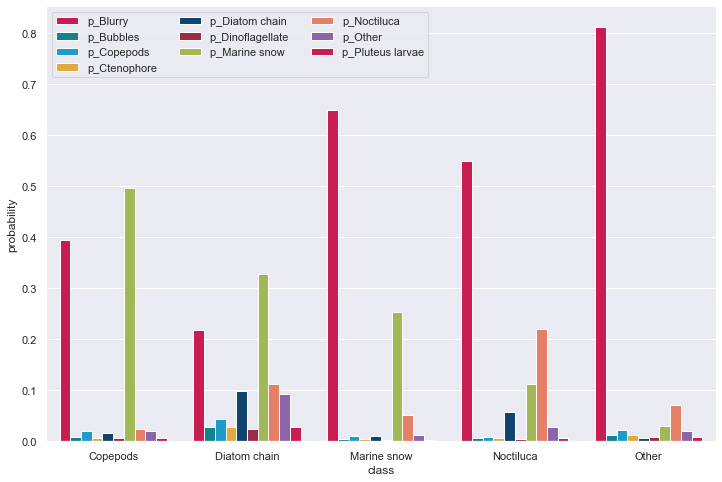

'mean(p(prediction|image)) | prediction != truth'

In [150]:
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

hereon_color_array = np.array([
         [230, 0, 70],
    [0,145,160],

    [0, 170, 230],
   
    
    [250,180,35],
    [0,70,125],
    [175, 25, 60],
    [170, 200 ,70],
    [250,115,80],
    [140, 90, 180],
      
])
hereon_color_array = hereon_color_array / 255
hereon_cmap = ListedColormap(hereon_color_array)

sns.set_palette(hereon_color_array)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="class", y="probability", data=df_wrong_grouped, hue="label", ax=ax, palette=hereon_color_array)
ax.legend(ncol=3)
plt.show()

"""mean(p(prediction|image)) | prediction != truth"""

In [152]:
df_ambiguous = df_merged[df_merged["cnn-eval"] == "Ambiguous"].copy()
p_cols = [key for key in df_merged.keys() if key.startswith("p_")]
df_ambiguous["max_p"] = df_ambiguous[p_cols].max(axis=1)

df_ambiguous_grouped = df_ambiguous.groupby("class").mean()[p_cols].reset_index()
df_ambiguous_grouped

,class,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,Blurry,0.200378,0.000919,0.004832,0.000955,0.001411,0.000653,0.780924,0.005653,0.003531,0.000745
1,Marine snow,0.752704,0.002059,0.005306,0.001931,0.003768,0.001371,0.215584,0.010048,0.005585,0.001645
2,Noctiluca,0.406458,0.001128,0.001786,0.001287,0.001239,0.000683,0.439329,0.141458,0.005010,0.001622


In [157]:
df_ambiguous_grouped = pd.melt(df_ambiguous_grouped, id_vars="class", var_name="label", value_name="probability")
df_ambiguous_grouped.head()

,class,label,probability
0,Blurry,p_Blurry,0.200378
1,Marine snow,p_Blurry,0.752704
2,Noctiluca,p_Blurry,0.406458
3,Blurry,p_Bubbles,0.000919
4,Marine snow,p_Bubbles,0.002059


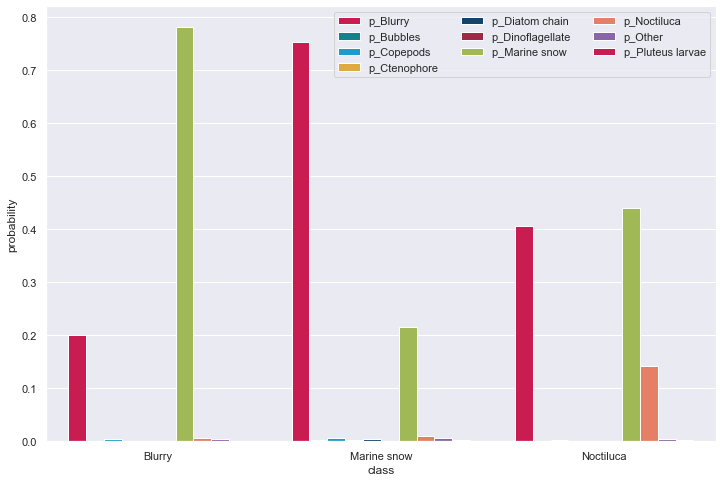

In [158]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="class", y="probability", data=df_ambiguous_grouped, hue="label", ax=ax, palette=hereon_color_array)
ax.legend(ncol=3)
plt.show()